In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sympy as sp

import os

# os.chdir('/home/pl61/density-regression/deep-symbolic-optimization/dso')

from dso.kernels import GaussianKernel, DSOSteinKernel, GaussianKernel_v2
from dso.discrepancies import (
    DSOKernelSteinDiscrepancy,
)
from scipy.spatial.distance import pdist

ModuleNotFoundError: No module named 'dso'

In [2]:
def median_heuristic_bandwidth(Y: np.ndarray) -> float:
    """
    Calculates the optimal bandwidth for an RBF kernel using the Median Heuristic.

    Parameters:
    - Y (np.ndarray): A 2D numpy array where rows represent samples and columns represent dimensions.

    Returns:
    - float: The bandwidth parameter sigma.
    """
    # Compute the pairwise distances between points in Y
    pairwise_distances = pdist(Y, metric="euclidean")

    # Calculate the median of the pairwise distances
    sigma = np.median(pairwise_distances)

    return sigma

In [3]:
dataset = pd.read_csv("N(0,0.5)1000.csv", header=None)
d = np.asarray(dataset.iloc[:, 0])
y = d.reshape(-1, 1)

x = sp.symbols("x")
h = 1 / median_heuristic_bandwidth(y)
gaussian_kernel = GaussianKernel(sigma=h)


def rew_given_dens(formula, kernel, y):
    dd = DSOSteinKernel(kernel=kernel, distribution=formula)
    ddd = DSOKernelSteinDiscrepancy(DSO_stein_kernel=dd)
    # return 0 if ddd.compute(y) <= -2 else 1/(1 +np.abs(ddd.compute(y)))
    return ddd.compute(y)

In [4]:
grid = np.linspace(0.001, 2.0, 1000)
rr = np.zeros_like(grid)

for i in range(len(grid)):
    # rr[i] = rew_given_dens(sp.exp(-x**2 * grid[i]))
    rr[i] = rew_given_dens(
        formula=sp.exp(-(x**2) / (2 * grid[i])), kernel=gaussian_kernel, y=y
    )
    print(rr[i])

91824.59375
10112.7490234375
3610.285400390625
1826.72607421875
1095.893798828125
727.5150146484375
516.5376586914062
384.7278137207031
297.0101623535156
235.76531982421875
191.36001586914062
158.16896057128906
132.729736328125
112.81737518310547
96.9497299194336
84.10890197753906
73.5772476196289
64.8372802734375
57.50820541381836
51.30497741699219
46.0107421875
41.45824432373047
37.51682662963867
34.08323669433594
31.0750675201416
28.425844192504883
26.08154296875
23.997859954833984
22.138206481933594
20.47216033935547
18.974246978759766
17.623029708862305
16.400348663330078
15.290749549865723
14.281015396118164
13.359786033630371
12.51726245880127
11.744950294494629
11.035455703735352
10.382331848144531
9.779926300048828
9.223265647888184
8.70797348022461
8.230171203613281
7.7864227294921875
7.373672962188721
6.989194869995117
6.630555152893066
6.295567035675049
5.982273101806641
5.688909530639648
5.41388463973999
5.155762195587158
4.913240432739258
4.685138702392578
4.4703860282897

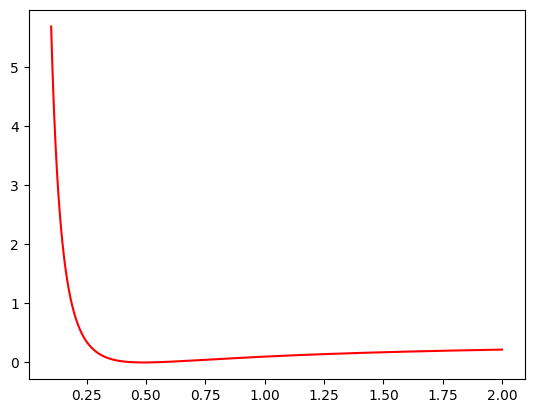

In [5]:
plt.plot(grid[50:], rr[50:], color="r", linestyle="-")
plt.show()

In [7]:
print(np.min(rr))
print(grid[np.argmin(rr)])

-0.0038191997446119785
0.49124524524524527


In [8]:
np.var(y)

0.4936232661566186